# Datenanalyse des "Library Collection Inventory" Datenset der Seattle Public Library 
## (+ kleinere zusätzliche Fragestellung anhand des 'Checkouts by Title' Datensets der Seattle Public Library)

## Beschreibung des Datensets

Für die Datenananlyse wurde das "Library Collection Inventory" Datenset der Seattle Public Library ausgewählt. Das Datenset enthält Daten zu allen physischen Objekten der Seattle Public Library. Es sind insgemsamt 13 Spalten vorhanden, welche unter anderem Informationen zu Titel, Autor, ISBN, Erscheinungsjahr, spezifische thematische Schlagwörter, welche für ein Objekt vergeben worden sind und Informationen über den Standort eines Objekts enthalten.

## Fragestellungen

Es werden folgende Fragestellungen anhand des "Library Collection Inventory" Datensets untersucht: 

1) Wie viele Objekte „schweben“ zur Zeit der letzten Momentaufnahme?

2) Wie viele Exemplare gibt es durchschnittlich von einem Medium?

3) Wie viele Objekte gibt es zum Thema Computer Programming? 
   
3.1) Erweiterung: Wie viele Objekte gibt es zu einem bestimmten Thema?

3.2) Wie lauten die vollständigen Titel der Objekte für die ein übergebener String innerhalb der Subjects vorhanden ist?



--

Es wird folgende Fragestellung anhand des "Checkouts by Title" Datensets untersucht: 

4) Welches Buch wurde am häufigsten ausgeliehen? (+ Wie häufig wurde es ausgeliehen?)

## Datenanalyse

In [6]:
# Zunächst werden die Pakete "pandas", "seaborn" sowie "matplotlib.pyplot" importiert.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Mithilfe von Pandas werden die Daten eingelesen.
url = "https://data.seattle.gov/resource/6vkj-f5xf.csv"
spl = pd.read_csv(url)

In [8]:
spl

,bibnum,title,author,isbn,publicationyear,publisher,subjects,itemtype,itemcollection,floatingitem,itemlocation,reportdate,itemcount
0,106278,The Sporting news' national football guide.,NaN,NaN,NaN,Sporting News.,Football United States History Periodicals,arbk,cs8r,NaN,cen,2017-09-01T00:00:00.000,1
1,442617,NaN,NaN,NaN,NaN,NaN,NaN,acmus,camus,NaN,cen,2017-09-01T00:00:00.000,1
2,2748722,You can get there from here : my journey from ...,"Knowling, Bob","1591844223, 9781591844228",2011.,"Portfolio/Penguin,","Knowling Bob, African American businesspeople ...",acbk,naaanf,NaN,dth,2017-09-01T00:00:00.000,1
3,2881800,Naomi [sound recording] / the Cave Singers.,Cave Singers,NaN,p2013.,"Jagjaguwar,","Popular music 2011 2020, Rock music 2011 2020",accd,naover,NaN,gwd,2017-09-01T00:00:00.000,1
4,3181907,Bilgewater / Jane Gardam.,"Gardam, Jane","160945331X, 9781609453312",2016.,"Europa Editions,","Teenage girls Fiction, Teenagers Fiction, Boar...",acbk,nafic,NaN,qna,2017-09-01T00:00:00.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2035646,Friedrich Hayek : a biography / Alan Ebenstein.,"Ebenstein, Alan O.",0312233442,2001.,"St. Martin's Press,",Hayek Friedrich A von Friedrich August 1899 19...,acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1
996,3181802,The young Messiah [videorecording] / Focus Fea...,NaN,NaN,2016.,"Universal Pictures Home Entertainment,","Jesus Christ Drama, Feature films, Religious f...",acdvd,nadvd,Floating,dlr,2017-09-01T00:00:00.000,2
997,3042073,In the company of Sherlock Holmes : stories in...,NaN,"1605986585, 9781605986586",2014.,"Pegasus Crime,","Holmes Sherlock Fiction, Watson John H Fictiti...",acbk,namys,Floating,mon,2017-09-01T00:00:00.000,1
998,2959621,The food parade : healthy eating with the nutr...,"Castaldi, Elicia","0805091769, 9780805091762",2013.,"Christy Ottaviano Books, Henry Holt and Company,","Diet Juvenile fiction, Children Nutrition Juve...",jcbk,ncnf,NaN,dth,2017-09-01T00:00:00.000,1


Das Datenset wurde nicht vollständig importiert. Das originale Datenset enthält 66,2 Millionen Zeilen. Im Folgenden werden alle Fragestellungen nur für die vorliegenden 1000 Zeilen betrachtet.

## Fragestellung 1
#### Wie viele Objekte „schweben“ zur Zeit der letzten Momentaufnahme?

In [11]:
spl["floatingitem"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
995         NaN
996    Floating
997    Floating
998         NaN
999         NaN
Name: floatingitem, Length: 1000, dtype: object

In [12]:
spl.floatingitem.describe()

count          145
unique           1
top       Floating
freq           145
Name: floatingitem, dtype: object

Die Variable "floatingitem" hat den Wert "Floating", wenn das Objekt sich aktuell im bewegten Zustand befindet (wenn es also aktuell keinen festen Standort besitzt). Ansonsten ist die Variable leer ("NaN"). Mithilfe der Funktion "describe()" konnte herausgefunden werden, dass 145 der 1000 Objekte sich im Status "Floating" befinden. 

## Fragestellung 2
#### Wie viele Exemplare gibt es durchschnittlich von einem Medium?

Um diese Frage zu beantworten, ist die Spalte ItemCount relevant, in welcher die Anzahl der Objekte in der jeweiligen Sammlung oder Kollektion angegeben ist. 

In [91]:
spl.itemcount.describe()

count    1000.000000
mean        1.221000
std         2.269209
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        71.000000
Name: itemcount, dtype: float64

Die 1000 betrachteten Objekte sind im Durchschnitt (arithmetisches Mittel) 1,22-Mal vorhanden. Es gibt einen Ausreißer, welcher 71x vorhanden ist. 

## Fragestellung 3
#### Wie viele physische Objekte gibt es zum Thema Computer Programming? 

In [13]:
spl["subjects"]

0             Football United States History Periodicals
1                                                    NaN
2      Knowling Bob, African American businesspeople ...
3          Popular music 2011 2020, Rock music 2011 2020
4      Teenage girls Fiction, Teenagers Fiction, Boar...
                             ...                        
995    Hayek Friedrich A von Friedrich August 1899 19...
996    Jesus Christ Drama, Feature films, Religious f...
997    Holmes Sherlock Fiction, Watson John H Fictiti...
998    Diet Juvenile fiction, Children Nutrition Juve...
999    DeMarco Joe Fictitious character Fiction, Gove...
Name: subjects, Length: 1000, dtype: object

In [14]:
spl.subjects.describe()

count                      951
unique                     927
top       Rock music 2011 2020
freq                         7
Name: subjects, dtype: object

Innerhalb der 1000 Objekte sind für 951 Daten innerhalb der Variable Subjects hinterlegt. Wie zu erwarten handelt es sich größtenteils um unterschiedliche Inhalte. Der Inhalt/das Thema das am häufigsten vorkommt (7-mal) ist "Rock music 2011 2020".
Im Folgenden soll untersucht werden, wie viele Werke der 1000 untersuchten Objekte das Thema "Computer Programming" behandeln.

Dazu soll eine for-Schleife implementiert werden, die den gesamten Datensatz durchläuft und für jede Zeile untersucht, ob der String "Computer Programming" im Feld subjects vorhanden ist. 
Um zu überprüfen, ob der String "Computer Programming" in subjects vorhanden ist, soll die Methode "__contains__" verwendet werden.

#### Testen der Methode contains

In [15]:
spl.subjects[0]

'Football United States History Periodicals'

In [16]:
spl.subjects[0].__contains__("Football")

True

In [17]:
spl.subjects[0].__contains__("Computer Programming")

False

Die Methode contains gibt einen Wahrheitswert zurück. Wenn der übergebene String im zu untersuchenden String enthalten ist, wird True zurückgegeben, ist dies nicht der Fall wird False zurückgegeben. 

In [18]:
spl.subjects[1].__contains__("Computer Programming")

AttributeError: 'float' object has no attribute '__contains__'

In der zweiten Zeile des Datensatzes befindet sich ein Eintrag, für den kein Subject hinterlegt ist. Auf diese "leeren Einträge" kann die Funktion "contains" nicht angewendet werden. 

In [30]:
type(subjects[0])

str

In [31]:
type(subjects[1])

float

Mithilfe der Methode type konnte herausgefunden werden, dass die Objekte, in denen unter subjects Daten hinterlegt sind, vom Typ String sind, während Objekte, bei denen kein Subject vorhanden ist, vom Typ float sind. 

In [65]:
# Mithilfe der Methode str() kann der Typ float in den Typ String umgewandelt werden.
type(str(subjects[1]))

str

In [33]:
str(subjects[1]).__contains__("Football")

False

In [34]:
str(subjects[1]).__contains__("nan")

True

Mithilfe der Methode str() kann die Methode contains nun auch auf die Objekte angewendet werden, für die keine Daten im Feld subjects hinterlegt sind.

In [66]:
# Um mit den subjects arbeiten zu können, müssen diese außerdem in ein Dictionary umgewandelt werden.
# In der Variable Subjects wird der Inhalt der Spalte subjects aus dem Ausgangsdatensatz als Dictionary abgelegt.
subjects = dict(spl.subjects)

In [25]:
# Ausgabe des Dictionary subjects. Der Übersichtlichkeit halber werden nur die ersten 10 Zeilen ausgegeben.
for i in subjects:
    print(subjects[i])
    if i >=9:
        break

Football United States History Periodicals
nan
Knowling Bob, African American businesspeople Biography, Success in business
Popular music 2011 2020, Rock music 2011 2020
Teenage girls Fiction, Teenagers Fiction, Boarding schools Fiction, Identity Psychology Fiction, England Fiction, Bildungsromans
nan
nan
United States Federal Bureau of Investigation Drama, FBI Academy Behavioral Science Unit Drama, Criminal investigation Drama, Criminal behavior Prediction of Drama, Criminal profilers Drama, Television series, Fiction television programs, Television cop shows, Thrillers Television programs, Video recordings for the hearing impaired
Cosby Bill 1937, Comedians United States Biography
Aliksandrina Library History Juvenile literature, Libraries Egypt Alexandria Juvenile literature, Libraries Destruction and pillage Egypt Alexandria Juvenile literature, Cultural property Protection Juvenile literature, Egypt History 21st century Juvenile literature, Aliksandrina Library Juvenile literature

### for-Schleife

In [26]:
# Es wird eine leere Liste namens ergebnis_computer_programming erzeugt. 
ergebnis_computer_programming = []

# Die for-Schleife durchläuft das Dictionary subjects. Wenn der String "Computer Programming" in einer Zeile enthalten ist, 
# wird dies in der Ergebnisliste gespeichert. Die Länge der Ergebnisliste wird ausgegeben.
for i in subjects:
    if str(subjects[i]).__contains__("Computer Programming"):
        ergebnis_computer_programming.append(i)
print(len(ergebnis_computer_programming))

0


In der Liste sind keine Elemente enthalten. In dem Beispieldatensatz gibt es also kein Werk, welches mit dem Subject "Computer Programming" gekennzeichnet ist. Ich starte nochmal einen neuen Versuch mit dem String "Football". 

In [27]:
ergebnis_football = []

for i in subjects:
    if str(subjects[i]).__contains__("Football"):
        ergebnis_computer_programming.append(i)
print(len(ergebnis_computer_programming))

2


Zwei der 1000 betrachteten Datensätze enthalten das Thema "Football" innerhalb der Kategorie subjects. Die zu Beginn formulierte Fragestellung ist somit beantwortet. Im Folgenden soll noch eine Funktion implementiert werden, an die ein beliebiger String übergeben werden kann und die dann überprüft in wie vielen der hier betrachteten Datensätze dieser String enthalten ist. 

### Fragestellung 3.1: Wie viele Objekte gibt es zu einem bestimmten Thema?

In [67]:
# Im Folgenden wird die Funktion how_many_books_concerning implementiert, welche angibt, wie viele physische Objekte 
# den übergebenen String in der Spalte "Subjects" enthalten. Diese Funktion soll so in etwas widergeben, 
# wie viele Objekte zu einem bestimmten Thema vorhanden sind. 
def how_many_books_concerning(subject):
    ergebnis = []
    for i in subjects:
        if str(subjects[i]).__contains__(subject):
            ergebnis.append(i)
    print(len(ergebnis))

In [68]:
how_many_books_concerning("Football")

2


In [69]:
how_many_books_concerning("Computer Programming")

0


In [70]:
how_many_books_concerning("Computer")

2


In [73]:
how_many_books_concerning("Rock music")

27


Nun kann für jeden beliebigen String ausgegeben werden, wie viele physische Objekte den übergebenen String in der Spalte Subjects enthalten (hier leider nur beispielthaft für den verwendeten Datensatz mit 1000 Zeilen). Dabei muss beachtet werden, dass die Groß- und Kleinschreibung eine Rolle spielt. 

### Fragestellung 3.2 
#### Wie lauten die vollständigen Titel der Objekte für die ein übergebener String innerhalb der Subjects vorhanden ist?
Aufbauend auf der zuvor implementierten Funktion in 2.1 soll nun eine Funktion implementiert werden, die die Titel derjenigen Objekte ausgibt, für die ein übergebener String innerhalb der Kategorie Subjects vorhanden ist.

In [76]:
def full_title(subject):
    for i in subjects:
        if str(subjects[i]).__contains__(subject):
            print(spl.title[i])

In [77]:
full_title("Football")

The Sporting news' national football guide.
The football fanbook / Gary Gramling ; design by Beth Bugler.


In [79]:
full_title("Computer")

Microsoft Outlook 2016 step by step / Joan Lambert.
Eleanor Oliphant is completely fine / Gail Honeyman.


In [80]:
full_title("Rock music")

Naomi [sound recording] / the Cave Singers.
Morrison Hotel [sound recording] / the Doors.
This nation's saving grace [sound recording] / the Fall.
Preliminaires [sound recording] / Iggy Pop.
Trace [sound recording] / Son Volt.
The wonder of you / Elvis with the Royal Philharmonic Orchestra.
Hesitant alien [sound recording] / Gerard Way.
Life turns electric [sound recording] / Finger Eleven.
Clear lake forest [sound recording] / the Black Angels.
The Helio Sequence [sound recording].
No Seattle [sound recording] : forgotten sounds of the North-west grunge era 1986-97.
Adore life / Savages.
I'm a believer : my life of Monkees, music, and madness / Micky Dolenz and Mark Bego.
Now that's what I call music! 40 [sound recording].
All access : the rock 'n' roll photography of Ken Regan / by Ken Regan with Jim Jerome ; preface by Keith Richards ; introduction by Mick Jagger ; afterword by James Taylor.
Jet plane and oxbow / Shearwater.
Rad times xpress IV [sound recording] / Black Bananas.
We'

Die Funktion full_title wurde erfolgreich implementiert. Nun kann eine Liste von Titeln ausgegeben werden, für die ein übergebener String innerhalb der Kategorie Subjects enthalten ist. 

# Hinzufügen des Datensets 'Checkout by Title'
## Fragestellung 4: Welches Buch wurde am häufigsten ausgeliehen?

Im Folgenden interessiert mich die Fragestellung, welches Buch am häufigsten ausgeliehen worden ist. Um diese Fragestellung beantworten zu können, importiere ich zusätzlich zum Library Collection Inventory Datenset der Seattle Public Library das Checkouts by Title Set der Seattle Public Library. 
Dieses Datenset enthält die monatlichen Ausleihen nach Titel für physische und elektronische Medien. Das Datenset enthält insgesamt 11 Spalten. Neben bibliographischen Daten wie Titel, Autor oder Verleger ist unter anderem in der Spalte checkouts angegeben, wie oft ein Objekt innerhalb des aktuellen checkoutmonth ausgeliehen worden ist.

In [57]:
# Import des Datensets 'Checkout by Title'
url_title = "https://data.seattle.gov/resource/tmmm-ytt6.csv"
spl_title = pd.read_csv(url_title)

In [58]:
spl_title

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2012,2,2,Code Geass : Lelouch of the rebellion. [8] / b...,"Majiko, 1978-","Revolutionaries Comic books strips etc, Terror...","Bandai Entertainment,",2011.
1,Physical,Horizon,BOOK,2012,2,1,Glavnyĭ semeĭnyĭ spravochnik po medi︠t︡sine : ...,"Swartzberg, John Edward, 1945-","Medicine Popular Handbooks manuals etc, Self c...","AST : Astrelʹ,",2007.
2,Physical,Horizon,BOOK,2012,2,1,style all her own,NaN,"Individuality Fiction, Clothing and dress Fict...",NaN,NaN
3,Physical,Horizon,BOOK,2012,2,1,Halmŏni ŭi chogakpo / Pʻaetʻŭrisya Pʻollakʻo c...,"Polacco, Patricia","Quilts Juvenile fiction, Jews Fiction, Emigrat...","Mirae M&B,",2003.
4,Physical,Horizon,BOOK,2012,2,3,Silly school / Marie-Louise Fitzpatrick.,"Fitzpatrick, Marie-Louise","First day of school Juvenile fiction, Schools ...","Frances Lincoln Children's Books,",2008.
...,...,...,...,...,...,...,...,...,...,...,...
995,Digital,OverDrive,EBOOK,2012,2,7,"The Devil Colony: Sigma Force Series, Book 7",James Rollins,"Fiction, Thriller",HarperCollins Publishers Inc.,2011
996,Physical,Horizon,SOUNDDISC,2012,2,1,Solid gold soul 1971,NaN,"Soul music, Popular music 1971 1980",NaN,NaN
997,Physical,Horizon,SOUNDDISC,2012,2,1,The basics of genetics [sound recording] / by ...,"Dyer, Betsey Dexter",Genetics,"Recorded Books,",p2009.
998,Physical,Horizon,SOUNDDISC,2012,2,1,Pianissimo,NaN,"Piano music Jazz, Latin jazz Cuba, Jazz Cuba 1...",NaN,NaN


Für die folgende Analyse muss beachtet werden, dass die Auswertung nur für die hier vorliegende Stichprobe von 1000 Objekten zutreffend ist. 

In [59]:
spl_title.checkouts.describe()

count    1000.000000
mean        2.994000
std         5.875243
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       125.000000
Name: checkouts, dtype: float64

<AxesSubplot:>

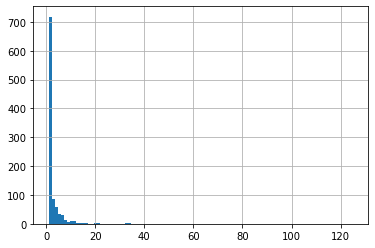

In [60]:
spl_title.checkouts.hist(bins=100)

Innerhalb der 1000 hier betrachteten Objekte wurde ein Medium im Durchschnitt 3,4-Mal ausgeliehen. Der Median beträgt 2. Das häufigste Medium wurde 181-Mal ausgeliehen. 
Anhand des erzeugten Histogramms lässt sich erkennen, der Großteil der Medien (über 600) nur einmal ausgeliehen worden sind. Das Medium, welches 125-Mal ausgeliehen worden ist, stellt einen absoluten Ausreißer dar. 
Im Folgenden soll herausgefunden werden, wie der Titel dieses Mediums lautet.

In [61]:
type(spl_title.checkouts)

pandas.core.series.Series

Um mit der Spalte Checkouts arbeiten zu können, muss diese zunächst in ein Dictionary umgewandelt werden. 

In [62]:
checkouts = dict(spl_title.checkouts)

In [75]:
for i in checkouts:
    if str(checkouts[i]).__contains__("125"):
        print(spl_title.title[i])

Date night [videorecording] / Twentieth Century Fox ; a 21 Laps production ; written by Josh Klausner ; produced and directed by Shawn Levy.


Der Titel des Buches, welcher innerhalb der betrachteten Stichprobe am häufigsten ausgliehen worden ist, lautet: "Date night [videorecording] / Twentieth Century Fox ; a 21 Laps production ; written by Josh Klausner ; produced and directed by Shawn Levy."

In [81]:
# Um nicht vorher mit der Funktion describe() herausfinden zu müssen, wo der Maximalwert liegt, wird der zuvor verwendete 
# String "125" durch "str(spl_title.checkouts.max())" ersetzt. So kann die Funktion auf jede Stichprobe des Datensatzes 
# angewendet werden.

for i in checkouts:
    if str(checkouts[i]).__contains__(str(spl_title.checkouts.max())):
        print(spl_title.title[i])

Date night [videorecording] / Twentieth Century Fox ; a 21 Laps production ; written by Josh Klausner ; produced and directed by Shawn Levy.


In [90]:
# Erweiterung der Bildschirmausgabe: Es soll nicht nur ausgegeben werden, welches Buch am häufigsten ausgeliehen wurde,
# sondern auch, wie häufig dieses ausgeliehen wurde. 

for i in checkouts:
    if str(checkouts[i]).__contains__(str(spl_title.checkouts.max())):
        print(spl_title.title[i] + " wurde " + str(spl_title.checkouts.max()) + "-mal ausgeliehen.")

Date night [videorecording] / Twentieth Century Fox ; a 21 Laps production ; written by Josh Klausner ; produced and directed by Shawn Levy. wurde 125-mal ausgeliehen.


# Diskussion

Es wurden zwei "kleinere" und zwei "größere" Fragestellungen beantwortet. Die beiden kleineren Fragestellungen (1 und 2) konnten jeweils mit der Funktion describe() beantwortet werden. Diese Funktion ist eine gute Möglichkeit, um sich einen ersten Überblick über größere Datenmengen zu verschaffen

Die zu anfangs formulierte Fragestellung, wie viele Titel es zum Thema Computer Programming gibt (Fragestellung), konnte beantwortet und um zwei Aspekte erweitert werden. Es wurden zwei Funktionen implementiert: 
1) Eine die überprüft, wie viele Objekte einen übergebenen String in der Spalte Subjects enthalten, um die anfangs formulierte Fragestellung für jeden String beantworten zu können. 
2) Eine, die die Titel aller Objekte ausgibt, welche einen übergebenen String in der Spalte Subjects enthalten.

Anschließend hat mich die Fragestellung interessiert, welches Buch am häufigsten ausgeliehen worden ist. Dazu habe ich zusätzlich das 'Checkouts by Title' Datenset hinzugezogen. Mithilfe der Implementierung einer for-Schleife konnte die formulierte Fragestellung beantwortet werden.

Schwierigkeiten: Dadurch, dass der Großteil der Daten im des 'Library Collection Inventory' Datensets im PlainText Format vorliegt, musste ich eine zu anfangs formulierte Fragestellung wieder verwerfen. Es sollte untersucht werden, aus welchem Erscheinungsjahr die meisten der vorhandenen physischen Objekte stammen. Die Erscheinungsjahre lagen allerdings nur als String vor und nicht als Integer. Dadurch, dass die Erscheinungsjahre teilweise geklammert waren, z.B. "[2015]" oder Satzzeichen enthielten, z.B. "2015.", habe ich es nicht geschafft die Daten in den Typ Integer umzuwandeln und konnte diese Fragestellung somit nicht beantworten.